In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [2]:
df_ori = pd.read_csv('BBB_planA_weekly.csv')
df = df_ori.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,id1
0,1,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,14.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,63.0,4.0,0.0,0.0,0.0,118.0,0.0,6.0,3.0,0.0,0.0,149.0,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0,0
1,1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,1.0,5.0,0.0,0.0,1.0,12.0,14.0,45.0,23.0,40.0,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,2.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,23.0,5.0,0.0,4.0,10.0,112.0,0.0,4.0,23.0,0.0,86.0,1.0,125.0,46.0,53.0,0.0,15.0,40.0,33.0,17.0,72.0,35.0,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0,2
3,1,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,54.0,0.0,23.0,47.0,35.0,106.0,91.0,35.0,12.0,73.0,12.0,204.0,92.0,102.0,23.0,71.0,99.0,12.0,225.0,149.0,4.0,19.0,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,3
4,0,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,1,64.0,28.0,29.0,21.0,9.0,25.0,0.0,42.0,3.0,0.0,25.0,0.0,34.0,16.0,35.0,21.0,15.0,1.0,6.0,41.0,0.0,0.0,14.0,0.0,21.0,15.0,31.0,0.0,2.0,14.0,30.0,1.0,8.0,78.0,0.0,2.0,0.0,0.0,0.0,0.0,5336
5337,0,32.0,14.0,7.0,38.0,15.0,84.0,43.0,32.0,0.0,0.0,15.0,1.0,2.0,63.0,0.0,15.0,3.0,16.0,4.0,3.0,8.0,4.0,17.0,14.0,42.0,2.0,0.0,14.0,1.0,1.0,7.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,5337
5338,1,562.0,272.0,62.0,149.0,73.0,265.0,142.0,107.0,279.0,197.0,217.0,195.0,179.0,68.0,221.0,134.0,278.0,207.0,55.0,68.0,55.0,40.0,211.0,251.0,72.0,34.0,29.0,129.0,64.0,21.0,0.0,44.0,48.0,103.0,4.0,7.0,0.0,0.0,0.0,0.0,5338
5339,0,0.0,14.0,0.0,13.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,3.0,67.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,50.0,0.0,0.0,14.0,0.0,8.0,5.0,4.0,31.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5339


# prepare X and y

In [4]:
X = df.drop(['final_result','id1'], axis=1)
X

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39
0,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,14.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,63.0,4.0,0.0,0.0,0.0,118.0,0.0,6.0,3.0,0.0,0.0,149.0,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0
1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,1.0,5.0,0.0,0.0,1.0,12.0,14.0,45.0,23.0,40.0,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,2.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,23.0,5.0,0.0,4.0,10.0,112.0,0.0,4.0,23.0,0.0,86.0,1.0,125.0,46.0,53.0,0.0,15.0,40.0,33.0,17.0,72.0,35.0,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0
3,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,54.0,0.0,23.0,47.0,35.0,106.0,91.0,35.0,12.0,73.0,12.0,204.0,92.0,102.0,23.0,71.0,99.0,12.0,225.0,149.0,4.0,19.0,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,64.0,28.0,29.0,21.0,9.0,25.0,0.0,42.0,3.0,0.0,25.0,0.0,34.0,16.0,35.0,21.0,15.0,1.0,6.0,41.0,0.0,0.0,14.0,0.0,21.0,15.0,31.0,0.0,2.0,14.0,30.0,1.0,8.0,78.0,0.0,2.0,0.0,0.0,0.0,0.0
5337,32.0,14.0,7.0,38.0,15.0,84.0,43.0,32.0,0.0,0.0,15.0,1.0,2.0,63.0,0.0,15.0,3.0,16.0,4.0,3.0,8.0,4.0,17.0,14.0,42.0,2.0,0.0,14.0,1.0,1.0,7.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0
5338,562.0,272.0,62.0,149.0,73.0,265.0,142.0,107.0,279.0,197.0,217.0,195.0,179.0,68.0,221.0,134.0,278.0,207.0,55.0,68.0,55.0,40.0,211.0,251.0,72.0,34.0,29.0,129.0,64.0,21.0,0.0,44.0,48.0,103.0,4.0,7.0,0.0,0.0,0.0,0.0
5339,0.0,14.0,0.0,13.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,3.0,67.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,50.0,0.0,0.0,14.0,0.0,8.0,5.0,4.0,31.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df['final_result']
y

0       1
1       1
2       0
3       1
4       0
       ..
5336    1
5337    0
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [6]:
# convert to numpy array
X = X.values
y = y.values

In [7]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 40)
(1603, 40)
(3738,)
(1603,)


In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

# build MLP model

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
X_train.shape[1:]

(40,)

In [38]:
##
epochs=200
lr=0.0001

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

##  loss: 0.3198 - accuracy: 0.8871 (epochs=200, lr=0.0001)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4489 - accuracy: 0.7966 (epochs=100, lr=0.00001)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.3110 - accuracy: 0.8877 (epochs=100, lr=0.0001) --> best

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4671 - accuracy: 0.8690 (epochs=100, lr=0.001)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               4100      
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 40)                4040      
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 41        
                                                                 
Total params: 8,181
Trainable params: 8,181
Non-trainable params: 0
_________________________________________________________________


# fit MLP model

In [40]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/200
117/117 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5899 - val_loss: 0.6529 - val_accuracy: 0.7024
Epoch 2/200
117/117 [==============================] - 0s 877us/step - loss: 0.6360 - accuracy: 0.7025 - val_loss: 0.5982 - val_accuracy: 0.7024
Epoch 3/200
117/117 [==============================] - 0s 868us/step - loss: 0.5845 - accuracy: 0.7025 - val_loss: 0.5472 - val_accuracy: 0.7024
Epoch 4/200
117/117 [==============================] - 0s 877us/step - loss: 0.5502 - accuracy: 0.7025 - val_loss: 0.5217 - val_accuracy: 0.7024
Epoch 5/200
117/117 [==============================] - 0s 882us/step - loss: 0.5295 - accuracy: 0.7025 - val_loss: 0.5068 - val_accuracy: 0.7024
Epoch 6/200
117/117 [==============================] - 0s 868us/step - loss: 0.5165 - accuracy: 0.7025 - val_loss: 0.4928 - val_accuracy: 0.7024
Epoch 7/200
117/117 [==============================] - 0s 868us/step - loss: 0.5042 - accuracy: 0.7025 - val_loss: 0.4796 - val_accu

117/117 [==============================] - 0s 877us/step - loss: 0.3272 - accuracy: 0.8793 - val_loss: 0.3193 - val_accuracy: 0.8796
Epoch 58/200
117/117 [==============================] - 0s 868us/step - loss: 0.3291 - accuracy: 0.8796 - val_loss: 0.3189 - val_accuracy: 0.8802
Epoch 59/200
117/117 [==============================] - 0s 877us/step - loss: 0.3275 - accuracy: 0.8791 - val_loss: 0.3187 - val_accuracy: 0.8815
Epoch 60/200
117/117 [==============================] - 0s 870us/step - loss: 0.3275 - accuracy: 0.8793 - val_loss: 0.3181 - val_accuracy: 0.8815
Epoch 61/200
117/117 [==============================] - 0s 868us/step - loss: 0.3269 - accuracy: 0.8793 - val_loss: 0.3180 - val_accuracy: 0.8821
Epoch 62/200
117/117 [==============================] - 0s 877us/step - loss: 0.3263 - accuracy: 0.8815 - val_loss: 0.3171 - val_accuracy: 0.8784
Epoch 63/200
117/117 [==============================] - 0s 868us/step - loss: 0.3272 - accuracy: 0.8815 - val_loss: 0.3171 - val_accuracy

117/117 [==============================] - 0s 903us/step - loss: 0.3029 - accuracy: 0.8879 - val_loss: 0.3129 - val_accuracy: 0.8871
Epoch 114/200
117/117 [==============================] - 0s 876us/step - loss: 0.3036 - accuracy: 0.8884 - val_loss: 0.3132 - val_accuracy: 0.8871
Epoch 115/200
117/117 [==============================] - 0s 883us/step - loss: 0.3018 - accuracy: 0.8933 - val_loss: 0.3128 - val_accuracy: 0.8865
Epoch 116/200
117/117 [==============================] - 0s 877us/step - loss: 0.3050 - accuracy: 0.8895 - val_loss: 0.3122 - val_accuracy: 0.8865
Epoch 117/200
117/117 [==============================] - 0s 877us/step - loss: 0.3024 - accuracy: 0.8887 - val_loss: 0.3118 - val_accuracy: 0.8858
Epoch 118/200
117/117 [==============================] - 0s 886us/step - loss: 0.3009 - accuracy: 0.8914 - val_loss: 0.3131 - val_accuracy: 0.8871
Epoch 119/200
117/117 [==============================] - 0s 877us/step - loss: 0.3057 - accuracy: 0.8906 - val_loss: 0.3126 - val_ac

Epoch 169/200
117/117 [==============================] - 0s 894us/step - loss: 0.2855 - accuracy: 0.8962 - val_loss: 0.3176 - val_accuracy: 0.8877
Epoch 170/200
117/117 [==============================] - 0s 886us/step - loss: 0.2885 - accuracy: 0.8933 - val_loss: 0.3176 - val_accuracy: 0.8877
Epoch 171/200
117/117 [==============================] - 0s 892us/step - loss: 0.2892 - accuracy: 0.8933 - val_loss: 0.3170 - val_accuracy: 0.8883
Epoch 172/200
117/117 [==============================] - 0s 877us/step - loss: 0.2916 - accuracy: 0.8951 - val_loss: 0.3162 - val_accuracy: 0.8877
Epoch 173/200
117/117 [==============================] - 0s 860us/step - loss: 0.2911 - accuracy: 0.8959 - val_loss: 0.3161 - val_accuracy: 0.8865
Epoch 174/200
117/117 [==============================] - 0s 866us/step - loss: 0.2877 - accuracy: 0.8957 - val_loss: 0.3167 - val_accuracy: 0.8865
Epoch 175/200
117/117 [==============================] - 0s 843us/step - loss: 0.2877 - accuracy: 0.8959 - val_loss: 0

In [41]:
history_model.params

{'verbose': 1, 'epochs': 200, 'steps': 117}

In [42]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 419us/step - loss: 0.3198 - accuracy: 0.8871


[0.31979358196258545, 0.8870866894721985]

# plot MLP learning process

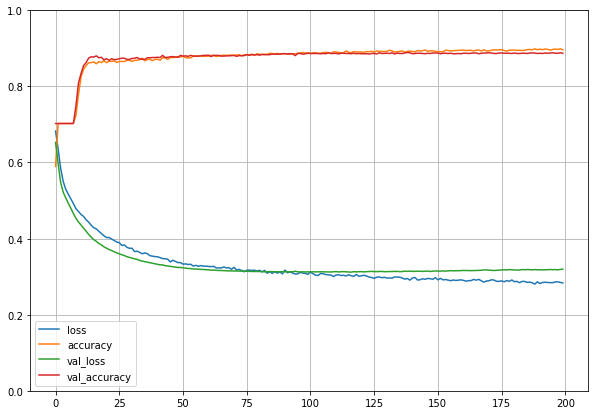

In [43]:
pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

another way to plot

def validation_training_process(history):
  plt.plot(history.history['loss'], label='Training Loss', color='green', linestyle = '--')
  plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', linestyle ='--')
  plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
  plt.title('Training Process Visualization')

  plt.xlabel('No. epoch')
  plt.legend()
  plt.show()

validation_training_process(history_model)